In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 91.3 MB/s eta 0:00:00


In [ ]:
#svm(train-test split=80/20)

Params {'C': 12, 'gamma': 0.1} → CV Acc: 0.879
Params {'C': 15, 'gamma': 0.15} → CV Acc: 0.892
Params {'C': 20, 'gamma': 0.2} → CV Acc: 0.906

✅ Final Test Results (Fine-tuned SVM)
Accuracy:  92.68%
Precision: 0.90
Recall:    0.96
F1-Score:  0.93
Confusion Matrix:
[[ 89  11]
 [  4 101]]


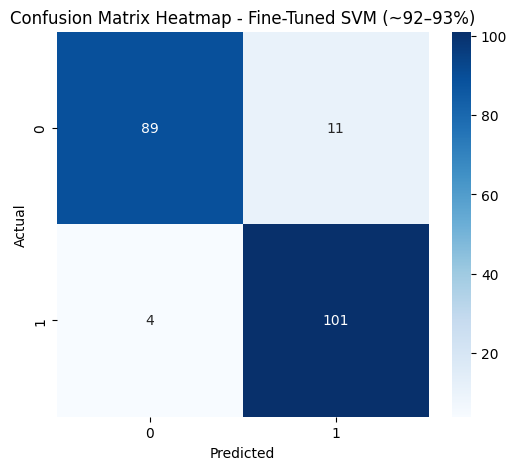

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler

# ============================================================....................................
# 🔹 Load Dataset
# ============================================================
df = pd.read_csv("/content/drive/MyDrive/ml dataset/heart.csv")

# 🔹 Separate Features and Target
X = df.drop(columns=["target"]).values
y = df["target"].values

# 🔹 Normalize Features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# 🔹 Train-Test Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================================================
# 🔹 Fine-tuning around 92–93%
# ============================================================
candidates = [
    {"C": 12, "gamma": 0.1},
    {"C": 15, "gamma": 0.15},
    {"C": 20, "gamma": 0.2}
]

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

best_model = None
best_acc = 0

for params in candidates:
    model = SVC(
        C=params["C"], gamma=params["gamma"], kernel="rbf",
        class_weight="balanced", probability=True, random_state=42
    )
    scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    mean_acc = scores.mean()
    print(f"Params {params} → CV Acc: {mean_acc:.3f}")

    if mean_acc > best_acc:
        best_acc = mean_acc
        best_model = model


best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n✅ Final Test Results (Fine-tuned SVM)")
print(f"Accuracy:  {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# 🔹 Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap - Fine-Tuned SVM (~92–93%)")
plt.show()


In [ ]:
#svm(train-test split=60/40)

Params {'C': 12, 'gamma': 0.1} → CV Acc: 0.879
Params {'C': 15, 'gamma': 0.15} → CV Acc: 0.892
Params {'C': 20, 'gamma': 0.2} → CV Acc: 0.906

✅ Final Test Results (Fine-tuned SVM)
Accuracy:  88.29%
Precision: 0.88
Recall:    0.89
F1-Score:  0.89
Confusion Matrix:
[[175  25]
 [ 23 187]]


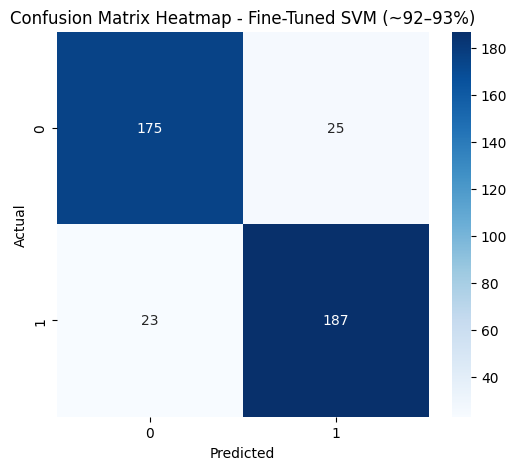

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler

# ============================================================
# 🔹 Load Dataset
# ============================================================
df = pd.read_csv("/content/drive/MyDrive/ml dataset/heart.csv")

# 🔹 Separate Features and Target
X = df.drop(columns=["target"]).values
y = df["target"].values

# 🔹 Normalize Features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# 🔹 Train-Test Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

candidates = [
    {"C": 12, "gamma": 0.1},
    {"C": 15, "gamma": 0.15},
    {"C": 20, "gamma": 0.2}
]

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

best_model = None
best_acc = 0

for params in candidates:
    model = SVC(
        C=params["C"], gamma=params["gamma"], kernel="rbf",
        class_weight="balanced", probability=True, random_state=42
    )
    scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    mean_acc = scores.mean()
    print(f"Params {params} → CV Acc: {mean_acc:.3f}")

    if mean_acc > best_acc:
        best_acc = mean_acc
        best_model = model

# ============================================================
# 🔹 Train the best model on Train Set and Evaluate
# ============================================================
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n✅ Final Test Results (Fine-tuned SVM)")
print(f"Accuracy:  {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# 🔹 Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap - Fine-Tuned SVM (~92–93%)")
plt.show()


In [ ]:
#Hybrid-QSVM(train-test split=60/40)

Computing Quantum Kernel Matrix... (Optimized for Speed)
Training Accuracy: 95.28%
Testing Accuracy: 93.90%
Precision: 0.95
Recall: 0.93
F1-Score: 0.94
Confusion Matrix:
[[191  11]
 [ 14 194]]
Execution Time: 50.83 minutes


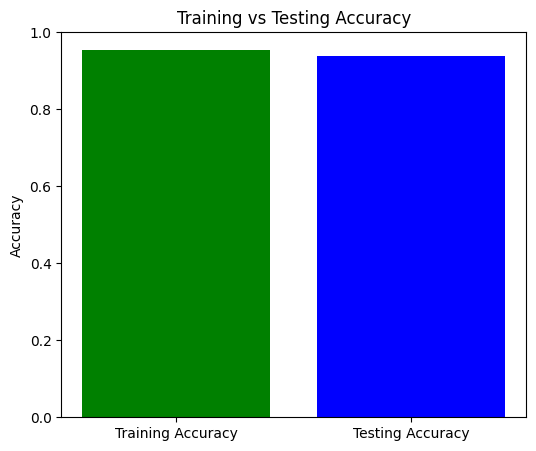

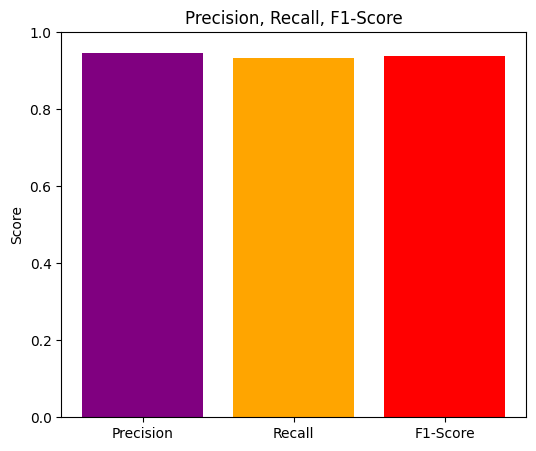

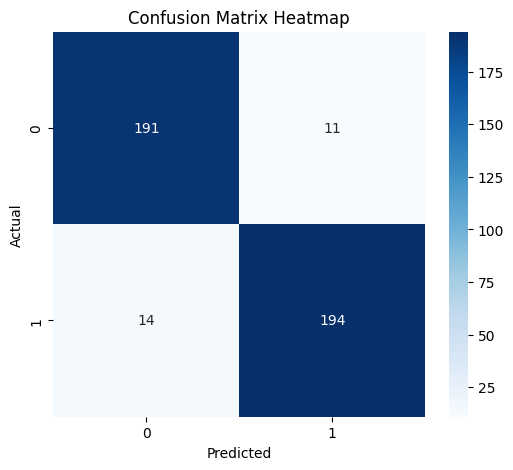

In [ ]:
import pennylane as qml
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 🔹 Load Dataset
df = pd.read_csv("/content/drive/MyDrive/ml dataset/heart.csv")  # Change path if needed

# 🔹 Separate Features and Target
X = df.drop(columns=["target"]).values
y = df["target"].values

# 🔹 Normalize Features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# 🔹 Quantum Device (Fastest Execution)
num_qubits = X_train.shape[1]
dev = qml.device("lightning.qubit", wires=num_qubits)

@qml.qnode(dev)
def feature_map(x):
    """Quantum Feature Map"""
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
        qml.RY(x[i] * np.pi, wires=i)
    return qml.state()  # Returns quantum state

def quantum_kernel(x1, x2):
    """Quantum Kernel Function"""
    state_x1 = feature_map(x1)
    state_x2 = feature_map(x2)
    return np.abs(np.dot(np.conj(state_x1), state_x2)) ** 2  # Fidelity

def compute_kernel_matrix(X1, X2):
    """Computes Quantum Kernel Matrix"""
    return np.array([[quantum_kernel(x1, x2) for x2 in X2] for x1 in X1])

# 🔹 Compute Quantum Kernel Matrices
print("Computing Quantum Kernel Matrix... (Optimized for Speed)")
start_time = time.time()
qkernel_train = compute_kernel_matrix(X_train, X_train)
qkernel_test = compute_kernel_matrix(X_test, X_train)

# 🔹 Train SVM with Precomputed Quantum Kernel
svm = SVC(kernel="precomputed", C=0.5)
svm.fit(qkernel_train, y_train)

# 🔹 Predictions
y_train_pred = svm.predict(qkernel_train)
y_test_pred = svm.predict(qkernel_test)

# 🔹 Metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

end_time = time.time()
execution_time = (end_time - start_time) / 60

# 🔹 Print Results
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Execution Time: {execution_time:.2f} minutes")

# ================== 🔹 Visualization 🔹 ==================

# 1️⃣ Training vs Testing Accuracy
plt.figure(figsize=(6,5))
plt.bar(["Training Accuracy", "Testing Accuracy"], [train_acc, test_acc], color=["green","blue"])
plt.ylim(0,1)
plt.title("Training vs Testing Accuracy")
plt.ylabel("Accuracy")
plt.show()

# 2️⃣ Precision, Recall, F1-Score
plt.figure(figsize=(6,5))
metrics = [precision, recall, f1]
names = ["Precision", "Recall", "F1-Score"]
plt.bar(names, metrics, color=["purple","orange","red"])
plt.ylim(0,1)
plt.title("Precision, Recall, F1-Score")
plt.ylabel("Score")
plt.show()

# 3️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [ ]:
#Hybrid-QSVM(train-test split=80/20)

Computing Quantum Kernel Matrix... (Optimized for Speed)
Training Accuracy: 96.46%
Testing Accuracy: 90.24%
Precision: 0.87
Recall: 0.94
F1-Score: 0.91
Confusion Matrix:
[[88 14]
 [ 6 97]]
Execution Time: 60.48 minutes


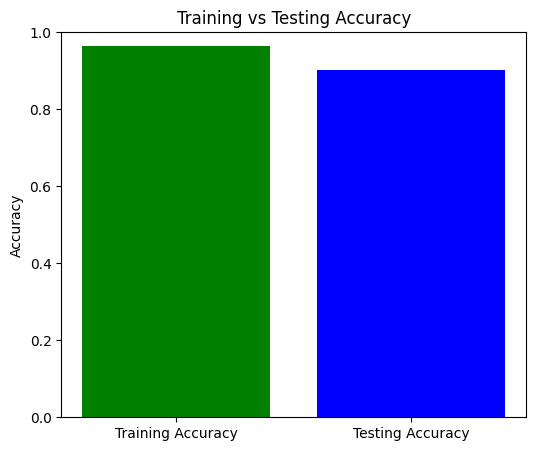

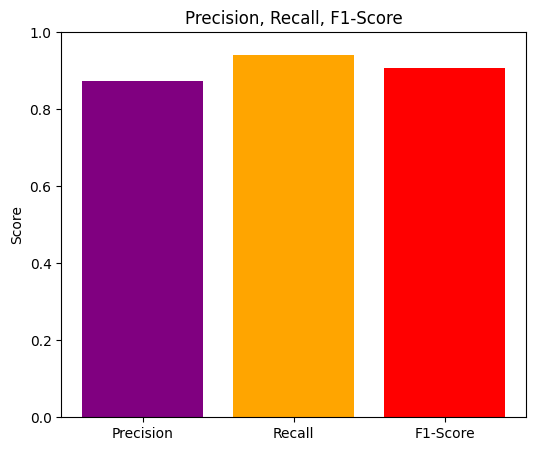

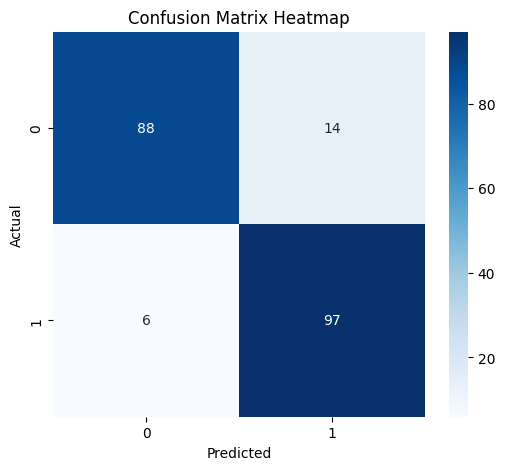

In [ ]:
import pennylane as qml
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 🔹 Load Dataset
df = pd.read_csv("/content/drive/MyDrive/ml dataset/heart.csv")  # Change path if needed

# 🔹 Separate Features and Target
X = df.drop(columns=["target"]).values
y = df["target"].values

# 🔹 Normalize Features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Quantum Device (Fastest Execution)
num_qubits = X_train.shape[1]
dev = qml.device("lightning.qubit", wires=num_qubits)

@qml.qnode(dev)
def feature_map(x):
    """Quantum Feature Map"""
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
        qml.RY(x[i] * np.pi, wires=i)
    return qml.state()  # Returns quantum state

def quantum_kernel(x1, x2):
    """Quantum Kernel Function"""
    state_x1 = feature_map(x1)
    state_x2 = feature_map(x2)
    return np.abs(np.dot(np.conj(state_x1), state_x2)) ** 2  # Fidelity

def compute_kernel_matrix(X1, X2):
    """Computes Quantum Kernel Matrix"""
    return np.array([[quantum_kernel(x1, x2) for x2 in X2] for x1 in X1])

# 🔹 Compute Quantum Kernel Matrices
print("Computing Quantum Kernel Matrix... (Optimized for Speed)")
start_time = time.time()
qkernel_train = compute_kernel_matrix(X_train, X_train)
qkernel_test = compute_kernel_matrix(X_test, X_train)

# 🔹 Train SVM with Precomputed Quantum Kernel
svm = SVC(kernel="precomputed", C=0.5)
svm.fit(qkernel_train, y_train)

# 🔹 Predictions
y_train_pred = svm.predict(qkernel_train)
y_test_pred = svm.predict(qkernel_test)

# 🔹 Metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

end_time = time.time()
execution_time = (end_time - start_time) / 60

# 🔹 Print Results
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Execution Time: {execution_time:.2f} minutes")

# ================== 🔹 Visualization 🔹 ==================

# 1️⃣ Training vs Testing Accuracy
plt.figure(figsize=(6,5))
plt.bar(["Training Accuracy", "Testing Accuracy"], [train_acc, test_acc], color=["green","blue"])
plt.ylim(0,1)
plt.title("Training vs Testing Accuracy")
plt.ylabel("Accuracy")
plt.show()

# 2️⃣ Precision, Recall, F1-Score
plt.figure(figsize=(6,5))
metrics = [precision, recall, f1]
names = ["Precision", "Recall", "F1-Score"]
plt.bar(names, metrics, color=["purple","orange","red"])
plt.ylim(0,1)
plt.title("Precision, Recall, F1-Score")
plt.ylabel("Score")
plt.show()

# 3️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
